# **Netflix Data: Cleaning, Analysis & Visualization**

## **A) Data Loading & Understanding**

In [1]:
# import data manipulation package:

import numpy as np
import pandas as pd

# import data visualization package

import matplotlib.pyplot as plt
import seaborn as sns

# supressing all the warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset:

df = pd.read_csv(r'F:\Coding\1) Internship - Unified Mentor\Project List\1) My Unified Mentor Projects\2) Netflix Data Cleaning Analysis and Visualization\Upload\netflix1.csv')

In [3]:
# Take a brief look at the data:

df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [4]:
# Get the dimensions of the DataFrame:

df.shape

(8790, 10)

In [5]:
# Get the row index of the datafreame:

df.index

RangeIndex(start=0, stop=8790, step=1)

In [6]:
# Get the column names of the Dataframe:

df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [7]:
# Looking at the basic information of the dataframe:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [8]:
# Check Datatype of each column:

df.dtypes

show_id         object
type            object
title           object
director        object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object

## **B) Data Cleaning & Preprocessing**

In [9]:
# Looking for any Missing Values:

df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [10]:
# Check number of duplicate data

print('Number of duplicate values =',df.duplicated().sum())

Number of duplicate values = 0


In [11]:
df2 = df.copy()       # Copy of df assigned to df2. Any changes made to df2 will not affect df & vice-versa
df2.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [12]:
# Convert datatype of 'date_added' column to 'datetime' datatype

df2['date_added'] = pd.to_datetime(df2['date_added'])

# Show datatype to confirm changes

print(df2['date_added'].dtypes)

datetime64[ns]


In [13]:
# Extract year and month columns from 'date_added' column

df2['year_added'] = df2['date_added'].dt.year
df2['month_added'] = df2['date_added'].dt.month

df2.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,9
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,9
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021,9
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",2021,9
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021,9


In [14]:
# Check datatypes of added columns

df2[['year_added', 'month_added']].dtypes   # using a list of column names

year_added     int32
month_added    int32
dtype: object

In [15]:
# Split the 'listed_in' column and count genres

df2['genre'] = df2['listed_in'].str.split(', ')   # Crime TV Shows(, )International TV Shows: here (, and space International)

df2 = df2.explode('genre').reset_index(drop=True)
df2.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year_added,month_added,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,9,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,9,Crime TV Shows
2,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,9,International TV Shows
3,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,9,TV Action & Adventure
4,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021,9,TV Dramas


In [16]:
# Casting 'genre' column into 'category' datatype

df2['genre'] = df2['genre'].astype('category')

# Check datatype after changes

df2['genre'].dtypes

CategoricalDtype(categories=['Action & Adventure', 'Anime Features', 'Anime Series',
                  'British TV Shows', 'Children & Family Movies',
                  'Classic & Cult TV', 'Classic Movies', 'Comedies',
                  'Crime TV Shows', 'Cult Movies', 'Documentaries',
                  'Docuseries', 'Dramas', 'Faith & Spirituality',
                  'Horror Movies', 'Independent Movies',
                  'International Movies', 'International TV Shows', 'Kids' TV',
                  'Korean TV Shows', 'LGBTQ Movies', 'Movies',
                  'Music & Musicals', 'Reality TV', 'Romantic Movies',
                  'Romantic TV Shows', 'Sci-Fi & Fantasy',
                  'Science & Nature TV', 'Spanish-Language TV Shows',
                  'Sports Movies', 'Stand-Up Comedy',
                  'Stand-Up Comedy & Talk Shows', 'TV Action & Adventure',
                  'TV Comedies', 'TV Dramas', 'TV Horror', 'TV Mysteries',
                  'TV Sci-Fi & Fantasy', '

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19294 entries, 0 to 19293
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       19294 non-null  object        
 1   type          19294 non-null  object        
 2   title         19294 non-null  object        
 3   director      19294 non-null  object        
 4   country       19294 non-null  object        
 5   date_added    19294 non-null  datetime64[ns]
 6   release_year  19294 non-null  int64         
 7   rating        19294 non-null  object        
 8   duration      19294 non-null  object        
 9   listed_in     19294 non-null  object        
 10  year_added    19294 non-null  int32         
 11  month_added   19294 non-null  int32         
 12  genre         19294 non-null  category      
dtypes: category(1), datetime64[ns](1), int32(2), int64(1), object(8)
memory usage: 1.6+ MB


In [18]:
# number of unique values in dataframe df2

df2.nunique()

show_id         8790
type               2
title           8787
director        4528
country           86
date_added      1713
release_year      74
rating            14
duration         220
listed_in        513
year_added        14
month_added       12
genre             42
dtype: int64

In [19]:
# Save the cleaned DataFrame to CSV
# df2.to_csv('netflix_analysis_cleaned.csv', index=False)

## **C) Exploratory Data Analysis (EDA)**

In [20]:
sns.set_style('whitegrid')

### **1) Most frequent genres released on Netflix**

In [21]:
df2['genre'].describe()

count                    19294
unique                      42
top       International Movies
freq                      2752
Name: genre, dtype: object

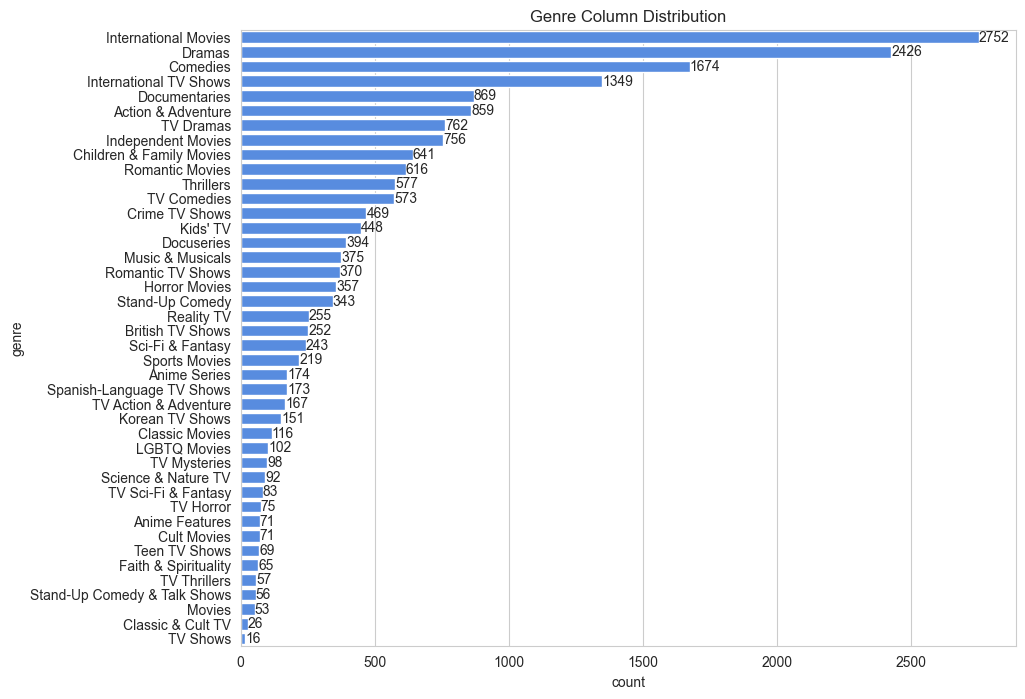

In [22]:
# Create a new figure with a specified width and height
plt.figure(figsize = (10,8))

# Create a horizontal count plot for the 'genre' column
ax = sns.countplot(
    y = 'genre',
    data = df2,

    # sorts genres by frequency in descending order
    order = df2['genre'].value_counts().index,
    color = '#4287f5'
)

plt.title('Genre Column Distribution')

# Loop through each bar container in the plot
for container in ax.containers:
  # Add count labels at the edge of each bar
  ax.bar_label(container, label_type = 'edge')

plt.show()


**CHART INSIGHT:**
*   **Dominant Genre:** The most frequent genre on Netflix is 'International Movies', appearing 2752 times across the dataset.
*   **High Volume Genres:** 'Dramas' and 'Comedies' also show a very strong presence, with counts in the range of 2400-2500 and 1700-1800 respectively, indicating their popularity among Netflix's offerings.
*   **International Content:** 'International TV Shows' are also a significant category, with approximately 1400 titles, suggesting Netflix's investment in international content.
*   **Variety of Genres:** There are a total of 42 unique genres identified in the dataset, showcasing the diverse range of content available on the platform.
*   **Content Strategy:** The distribution highlights Netflix's focus on international content, dramatic storytelling, and comedic entertainment, alongside a substantial collection of documentaries and action/adventure titles.







### **2) Movie & TV Show Release Year Distribution**

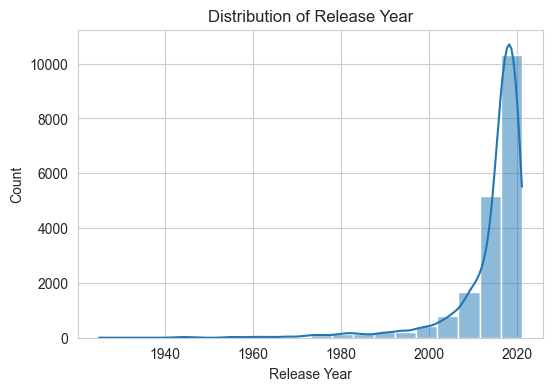

In [23]:
plt.figure(figsize = (6,4))
sns.histplot(df2['release_year'], bins = 20, kde=True)
plt.title('Distribution of Release Year')
plt.xlabel('Release Year')
plt.show()

**CHART INSIGHT:**
*   **Increasing Content Over Time:** The distribution shows a clear upward trend in content releases over the years, with a significant surge from around 2000 onwards.
*   **Peak Release Years:** The highest volume of content releases appears to be in the years leading up to 2020/2021, indicating a rapid expansion of Netflix's library in that period.
*   **Older Content:** While the majority of content is newer, there's also a tail extending back to earlier decades, showing that Netflix includes a collection of older films and TV shows.
*   **Rapid Growth:** The steep incline suggests an aggressive content acquisition and production strategy by Netflix in the latter half of the last decade.





### **3) Distribution of Content Type**

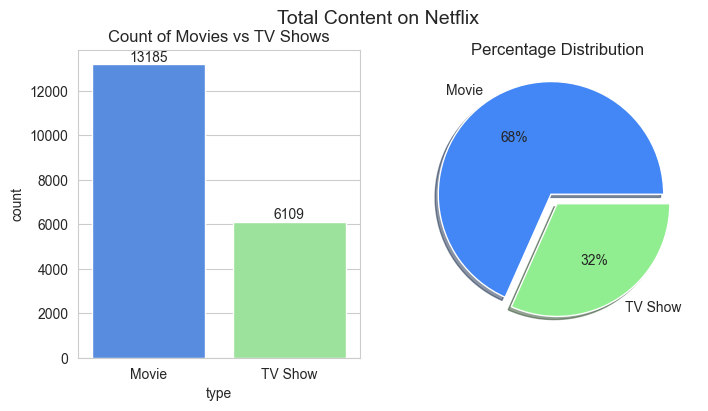

In [24]:
# Count how many Movies and TV Shows are in the dataset
type_counts = df2['type'].value_counts()

colors = ['#4287f5', '#90ee90']   # blue for Movies, green for TV Shows

# Create 1 row, 2 columns of plots
fig, axes = plt.subplots(1,2, figsize=(8,4))

# First plot: Countplot (bar chart)
ax = sns.countplot(x='type', data=df2, ax=axes[0], palette=colors)
axes[0].set_title('Count of Movies vs TV Shows')

# Add count labels on top of each bar
for container in ax.containers:
  ax.bar_label(container, label_type='edge')

# Second plot: Pie Chart
axes[1].pie(
    type_counts,
    labels=type_counts.index,
    autopct='%.0f%%',
    colors=colors,
    explode=(0.1,0),
    shadow=True
)
axes[1].set_title('Percentage Distribution')

# Add a main title
plt.suptitle('Total Content on Netflix', fontsize=14)

plt.show()

**CHART INSIGHT:**
*   **Dominance of Movies:** Movies significantly outnumber TV Shows on Netflix, accounting for approximately 68% of the total content (13,185 movie titles).
*   **Substantial TV Show Library:** While movies are more numerous, TV Shows still represent a substantial portion, making up about 32% of the content (6,109 TV Show titles).
*   **Content Strategy:** This distribution suggests that Netflix's content strategy leans heavily towards movies, offering a broader selection of films to its subscribers, while still maintaining a robust library of TV series.

### **4) Visualization of Rating Counts for Movies and TV shows on Netflix**

In [25]:
df2['rating'].value_counts()

rating
TV-MA       7306
TV-14       5239
TV-PG       1905
R           1582
PG-13        998
PG           607
TV-Y7        527
TV-G         459
TV-Y         405
NR           165
G             73
TV-Y7-FV      13
UR             8
NC-17          7
Name: count, dtype: int64

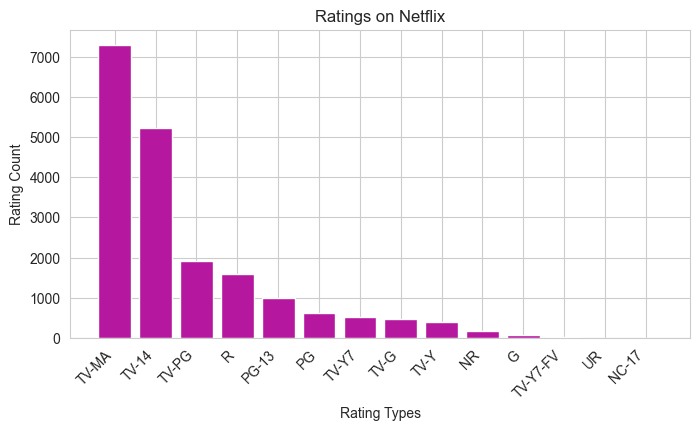

In [26]:
# Count the frequency of each rating and convert it into a DataFrame
ratings = df2['rating'].value_counts().reset_index()

# Rename the columns for better readability
ratings.columns = ['rating', 'count']

# Sort the ratings by count in descending order
ratings = ratings.sort_values(by='count', ascending=False)

plt.figure(figsize=(8,4))

#Plot a bar chart using ratings on the X-axis and their counts on the Y-axis
plt.bar(ratings['rating'], ratings['count'], color='#b5179e')

# Rotate X-axis labels for better readability and align them to the right
plt.xticks(rotation=45, ha='right')

plt.xlabel('Rating Types')
plt.ylabel('Rating Count')
plt.title('Ratings on Netflix')
plt.show()

**CHART INSIGHT:**
*   **Dominance of Mature Content:** The most prevalent rating on Netflix is 'TV-MA' (Mature Audience), with 7306 titles, followed closely by 'TV-14' (Parents Strongly Cautioned), with 5239 titles. This indicates a strong focus on content for adult and older teenage audiences.
*   **Family-Friendly Content:** While less dominant, 'TV-PG' (Parental Guidance Suggested) and 'TV-Y' (All Children) ratings are also significant, with 1905 and 405 titles respectively, suggesting a sizable library for younger viewers.
*   **Restricted Content:** 'R' rated content (Restricted) also has a notable presence with 1582 titles.
*   **Broad Age Range Coverage:** Netflix offers content across a wide spectrum of ratings, from 'G' (General Audiences) and 'TV-Y' for children to 'NC-17' (Adults Only) and 'UR' (Unrated), catering to diverse audience demographics and preferences.
*   **Content Strategy:** The distribution reflects a strategy that heavily favors content for mature audiences, likely aligning with the subscription-based model and the increasing demand for adult dramas, thrillers, and international series.


### **5) Top 10 Countries Ranked by Netflix Titles**

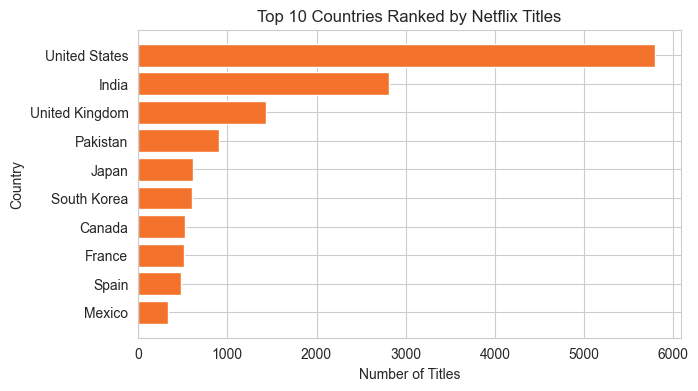

In [27]:
# Remove rows where country is 'Not Given'
filtered_df2 = df2[df2['country'] != 'Not Given']

# Count the number of titles for each country and select the top 10
top_countries = filtered_df2['country'].value_counts().head(10)

plt.figure(figsize=(7,4))

# Horizontal Bar Chart
plt.barh(top_countries.index, top_countries.values, color='#f3722c')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.title('Top 10 Countries Ranked by Netflix Titles')

# Invert Y-axis so the country with the highest count appears at the top
plt.gca().invert_yaxis()
plt.show()

**CHART INSIGHT:**
*   **United States Dominance:** The United States leads significantly with approx 6000 titles, highlighting its position as Netflix's primary content source or target market.
*   **Strong International Presence:** India and the United Kingdom follow with ~ 3000 and ~ 1500 titles, respectively, indicating Netflix's strong focus on these regions for content acquisition and production.
*   **Diverse Global Content:** Countries like Pakistan, Japan, South Korea, Canada, France, Spain, and Mexico also feature in the top 10, showcasing Netflix's commitment to offering a diverse range of international content.
*   **Key Markets:** The distribution reflects Netflix's strategic markets, with a clear emphasis on English-speaking countries and rapidly growing markets in Asia.

### **6) Top 10 Directors on Netflix**

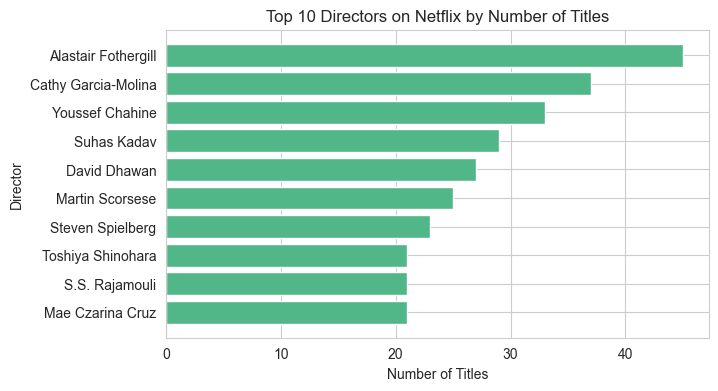

In [28]:
# Remove rows where director name is missing or marked as 'Unknown'
directors = df2[df2['director'] != 'Not Given']

# Count how many times each director appears in the dataset
director_counts = directors['director'].value_counts().head(10)

plt.figure(figsize=(7,4))
plt.barh(director_counts.index, director_counts.values, color = '#52b788')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.title('Top 10 Directors on Netflix by Number of Titles')

plt.gca().invert_yaxis()
plt.show()

In [29]:
# Country name of a selected director
x2 = df2[df2['director'] == 'Youssef Chahine']
print(x2['country'].unique())

['Egypt']


**CHART INSIGHT:**
*   **Leading Directors:** Alastair Fothergill (40+ titles), Cathy Garcia-Molina (35+ titles), and Youssef Chahine (30+ titles) are the top three directors with the most content on Netflix.
*   **Diversity in Filmmaking:** The list includes a diverse range of directors, suggesting Netflix partners with filmmakers from various regions and backgrounds.
*   **High Volume Content Creators:** Several directors have a significant number of titles, indicating a strategy of repeated collaboration or acquisition of extensive filmographies from certain creators.
*   **Global Reach:** The presence of directors from different countries (e.g., Alastair Fothergill from 'United Kingdom', Cathy Garcia-Molina from the 'Philippines', Youssef Chahine from 'Egypt') further emphasizes Netflix's global content strategy.


### **7) Yearly Netflix Releases: Movies vs TV Shows**

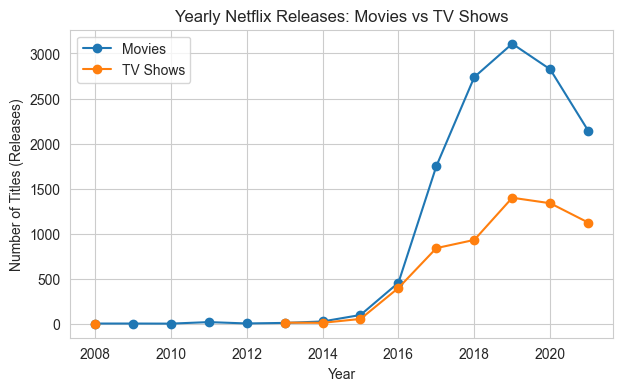

In [30]:
# Group data by year and content type, then count titles
yearly_counts = df2.groupby(['year_added', 'type']).size().reset_index(name='count')

# Pivot the table for easy plotting
yearly_pivot = yearly_counts.pivot(index='year_added', columns='type', values='count')

plt.figure(figsize=(7,4))

# Plot Movies trend
plt.plot(yearly_pivot.index, yearly_pivot['Movie'], marker='o', label='Movies')

# Plot TV Shows trend
plt.plot(yearly_pivot.index, yearly_pivot['TV Show'], marker='o', label='TV Shows')

plt.xlabel('Year')
plt.ylabel('Number of Titles (Releases)')
plt.title('Yearly Netflix Releases: Movies vs TV Shows')
plt.legend()
plt.show()

**CHART INSIGHT:**
*   **Overall Growth:** Both movie and TV show releases on Netflix have shown a significant upward trend over the years, indicating a continuous expansion of content on the platform.
*   **Peak in Recent Years:** The number of releases for both categories peaked around 2019 and 2020, suggesting a period of aggressive content acquisition and production by Netflix.
*   **Movies Outnumber TV Shows:** In most years, the number of movie releases has been consistently higher than TV show releases, particularly in the later years.
*   **Accelerated Growth Post-2015:** There's a noticeable acceleration in content additions for both movies and TV shows starting from approximately 2015-2016.
*   **Potential for Stabilization/Decrease in 2021:** There seems to be a slight dip or leveling off in content additions for both movies and TV shows in 2021, possibly indicating a shift in strategy or the impact of external factors.


### **8) Monthly Netflix Releases: Movies vs TV Shows**

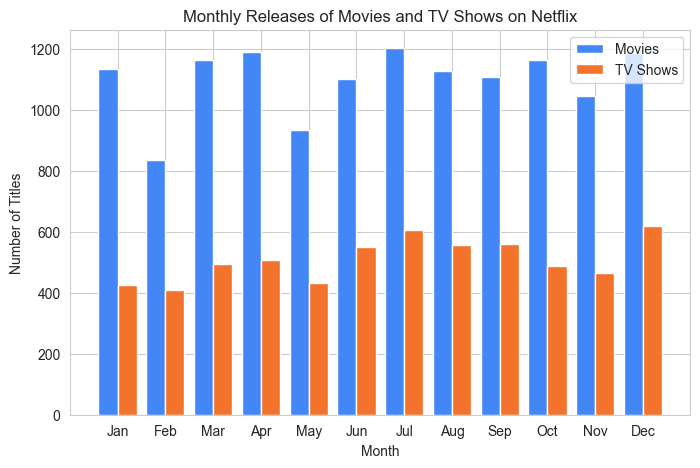

In [31]:
# Group data by month and type, then count titles
monthly_counts = df2.groupby(['month_added', 'type']).size().reset_index(name='count')

# Pivot the table to get Movies and TV Shows as separate columns
monthly_pivot = monthly_counts.pivot(index='month_added', columns='type', values='count')

# Sort months in correct order (1 to 12)
monthly_pivot = monthly_pivot.sort_index()

# Create positions for each month on X-axis
x = np.arange(len(monthly_pivot.index))
bar_width = 0.4

plt.figure(figsize=(8,5))

# Plot Movie bars
plt.bar(
    x - bar_width/2,
    monthly_pivot['Movie'],
    width = bar_width,
    color='#4287f5',
    label='Movies'
)

# Plot TV Show bars
plt.bar(
    x + bar_width/2,
    monthly_pivot['TV Show'],
    width=bar_width,
    color='#f3722c',
    label='TV Shows'
)

# instead of showing numbers (0–11), x‑axis will show month names
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May',
'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.xlabel('Month')
plt.ylabel('Number of Titles')
plt.title('Monthly Releases of Movies and TV Shows on Netflix')
plt.legend()
plt.show()

**CHART INSIGHT:**
*   **Fluctuating Monthly Releases:** Both movie and TV show releases show monthly fluctuations, indicating Netflix's strategy of staggered content drops throughout the year rather than a constant stream.
*   **Peak Release Months for Movies:** Months like March, April, July, October, and December consistently show higher volumes of movie releases (around 1100-1200 titles), possibly aligning with holiday seasons or strategic release windows.
*   **Peak Release Months for TV Shows:** TV show releases also show peaks, particularly in June, July, August, and December (around 550-600+ titles), suggesting an effort to capture audiences during summer and end-of-year viewing.
*   **Relatively Lower Releases in February:** February appears to be a comparatively slower month for releases across both content types, which might be due to shorter month duration or strategic content planning.
*   **End-of-Year Surge:** There's a notable increase in content additions, especially for TV shows, towards the end of the year (December), potentially to attract viewers during holiday periods.

## **D) Code for MySQL**

In [40]:
# install pymysql sqlalchemy
!pip install pymysql sqlalchemy
from sqlalchemy import create_engine


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
# Connect to MySQL
from sqlalchemy import create_engine

username = 'root'
password = 'admin7subrata1989'
host = 'localhost'
port = '3306'
database = 'netflix_data_project'

engine = create_engine(f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}")

In [42]:
# Load DataFrame to MySQL
table_name = 'netflix_data'
df2.to_sql(table_name, engine, if_exists = 'replace', index=False)

print(f"Data successfully loaded into table '{table_name}' in database '{database}'.")

Data successfully loaded into table 'netflix_data' in database 'netflix_data_project'.


In [43]:
# Read back sample
pd.read_sql("select * from netflix_data limit 5", engine)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year_added,month_added,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,9,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,9,Crime TV Shows
2,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,9,International TV Shows
3,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,9,TV Action & Adventure
4,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021,9,TV Dramas
